<a href="https://colab.research.google.com/github/athabrani/DeepLearning/blob/main/UTS_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q keras-tuner


import pandas as pd
import gdown
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, optimizers
import os
import shap
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 2.2 MB/s eta 0:00:00


In [3]:
url = "https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK"
output = "dataset.csv"
gdown.download(url, output, quiet=False)

df = pd.read_csv("dataset.csv")

Downloading...
From (original): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK
From (redirected): https://drive.google.com/uc?id=1oEXSD137hPm_Fx5xSPRvlAr3silj3suK&confirm=t&uuid=6cf0cfa3-5a7c-4c7d-8007-ab8d0e640f28
To: /content/dataset.csv
100%|██████████| 443M/443M [00:06<00:00, 67.5MB/s]


In [4]:
df = df.dropna()
df = df.drop_duplicates()
df.head()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
0,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
1,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
2,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
3,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903
4,2001,50.54767,0.31568,92.35066,22.38696,-25.51870,-19.04928,20.67345,-5.19943,3.63566,...,6.59753,-50.69577,26.02574,18.94430,-0.33730,6.09352,35.18381,5.00283,-11.02257,0.02263


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515130 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515130 non-null  int64  
 1   49.94357    515130 non-null  float64
 2   21.47114    515130 non-null  float64
 3   73.0775     515130 non-null  float64
 4   8.74861     515130 non-null  float64
 5   -17.40628   515130 non-null  float64
 6   -13.09905   515130 non-null  float64
 7   -25.01202   515130 non-null  float64
 8   -12.23257   515130 non-null  float64
 9   7.83089     515130 non-null  float64
 10  -2.46783    515130 non-null  float64
 11  3.32136     515130 non-null  float64
 12  -2.31521    515130 non-null  float64
 13  10.20556    515130 non-null  float64
 14  611.10913   515130 non-null  float64
 15  951.0896    515130 non-null  float64
 16  698.11428   515130 non-null  float64
 17  408.98485   515130 non-null  float64
 18  383.70912   515130 non-null  float64
 19  326.515

In [6]:
df.describe()

,2001,49.94357,21.47114,73.0775,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.0162,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
count,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,...,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000,515130.000000
mean,1998.396300,43.386243,1.284453,8.658865,1.164394,-6.553821,-9.521523,-2.391044,-1.793166,3.727748,...,15.756104,-73.458195,41.545971,37.934308,0.314492,17.675010,-26.320739,4.459232,20.034704,1.329613
std,10.931639,6.067918,51.583820,35.270798,16.322518,22.861826,12.858266,14.572838,7.964288,10.583763,...,32.100772,175.616882,122.230651,95.053404,16.161929,114.421362,173.989838,13.346688,185.570017,22.089498
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.953433,-26.065532,-11.463113,-8.487185,-20.667008,-18.441185,-10.780267,-6.469023,-2.294058,...,-1.813087,-139.546760,-20.987987,-4.669885,-6.782665,-31.578587,-101.533997,-2.565195,-59.508480,-8.819565
50%,2002.000000,44.257105,8.412635,10.476855,-0.652015,-6.007530,-11.187815,-2.047015,-1.736475,3.822310,...,9.171595,-53.084890,28.791115,33.622375,0.819805,15.597335,-21.214665,3.118175,7.764265,0.053340
75%,2006.000000,47.833555,36.121255,29.766593,8.788543,7.741405,-2.387207,6.508737,2.913968,9.962117,...,26.277387,13.483058,89.665733,77.785443,8.470098,67.794305,52.379945,9.968190,86.351715,9.681062
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


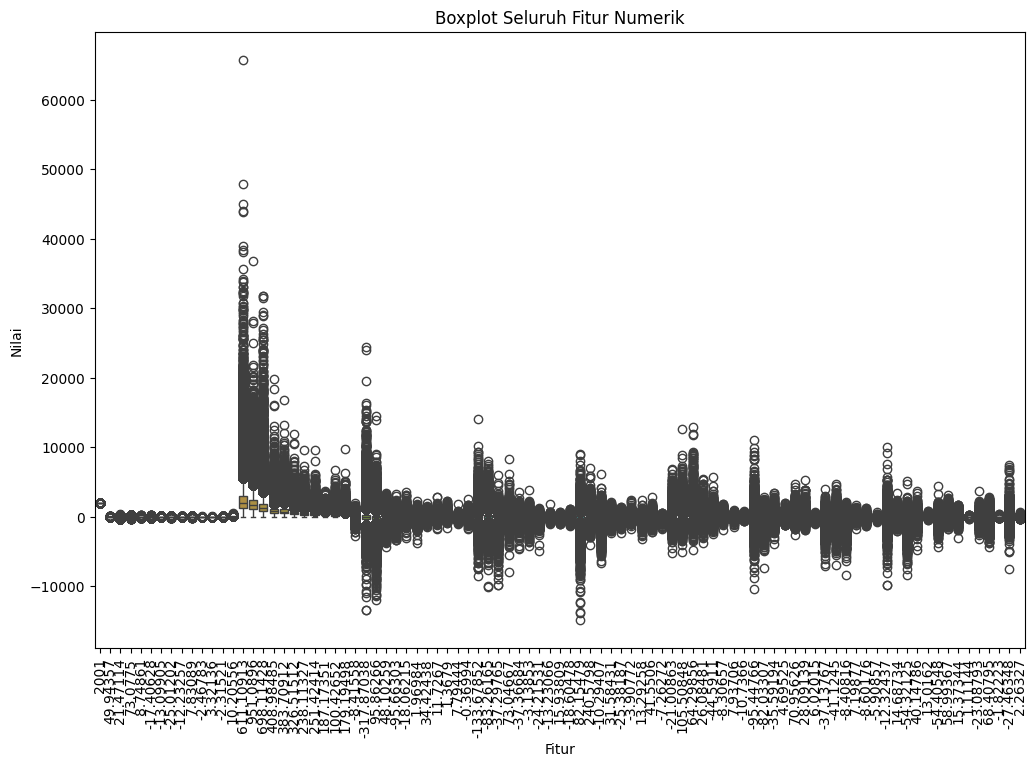

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot Seluruh Fitur Numerik')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.xticks(rotation=90)
plt.show()

In [8]:
#cleaning outlier

Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
mask = ~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)
df = df[mask]

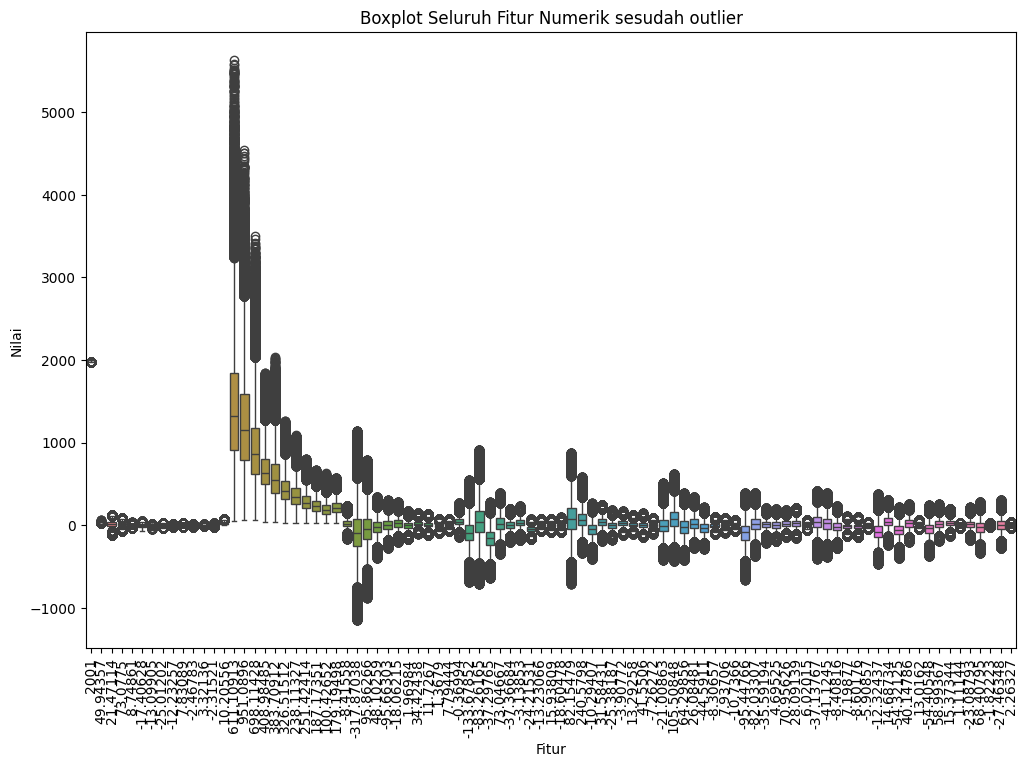

In [9]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df)
plt.title('Boxplot Seluruh Fitur Numerik sesudah outlier')
plt.xlabel('Fitur')
plt.ylabel('Nilai')
plt.xticks(rotation=90)
plt.show()

In [10]:
def create_preprocessing_pipeline(numeric_features, categorical_features):
    """
    Mengembalikan ColumnTransformer dengan:
    - StandardScaler untuk fitur numerik
    - OneHotEncoder(sparse=False) untuk fitur kategorikal
    """
    numeric_pipeline = Pipeline([
        ('scaler', StandardScaler())
    ])
    categorical_pipeline = Pipeline([
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_pipeline, numeric_features),
            ('cat', categorical_pipeline, categorical_features)
        ],
        remainder='drop'  # buang kolom lain jika ada
    )
    return preprocessor

In [11]:
#kolom target
REG_TARGET = df.columns[0]
# Untuk klasifikasi, kita binarisasi target regresi berdasarkan median
df['target_clf'] = (df[REG_TARGET] > df[REG_TARGET].median()).astype(int)
CLS_TARGET = 'target_clf'

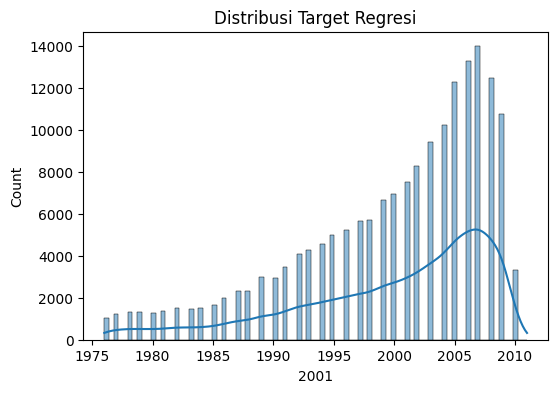

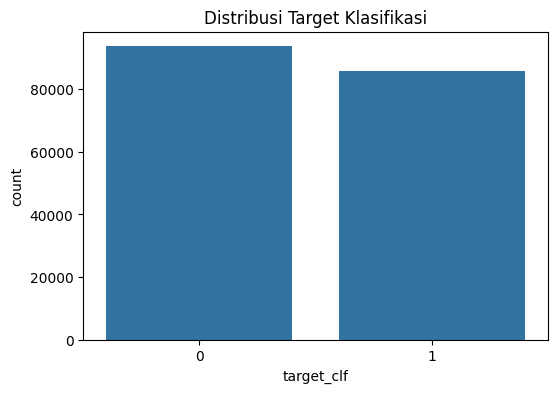

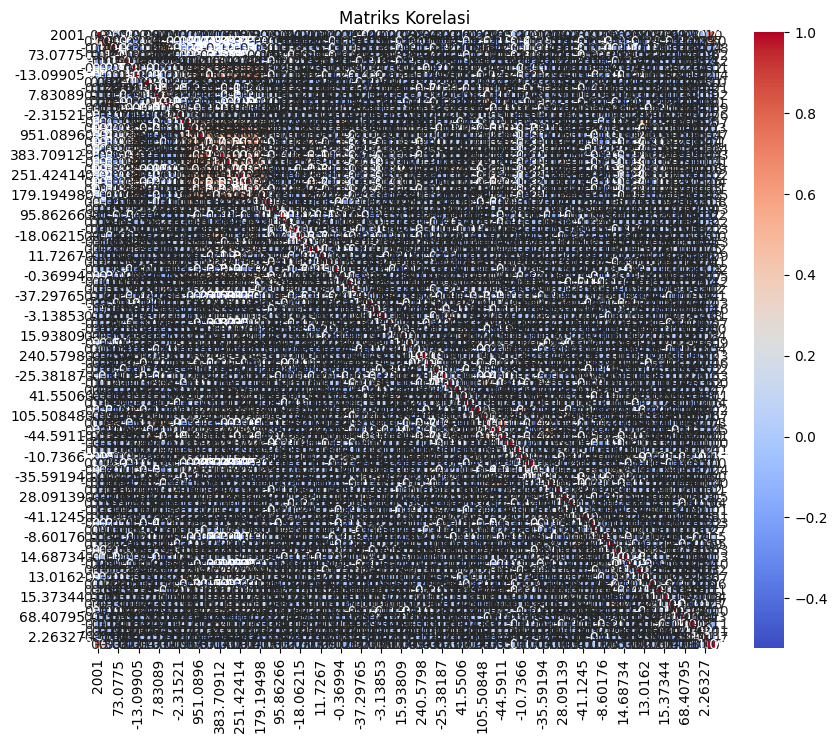

In [12]:
plt.figure(figsize=(6,4))
sns.histplot(df[REG_TARGET], kde=True)
plt.title('Distribusi Target Regresi')
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x=df[CLS_TARGET])
plt.title('Distribusi Target Klasifikasi')
plt.show()

plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [13]:
features = [c for c in df.columns if c not in [REG_TARGET, CLS_TARGET]]
numeric_feats = df[features].select_dtypes(include=['int64','float64']).columns.tolist()
categorical_feats = df[features].select_dtypes(include=['object','category']).columns.tolist()
preprocessor = create_preprocessing_pipeline(numeric_feats, categorical_feats)

# 7. Train/Test Split
X, y_reg, y_clf = df[features], df[REG_TARGET], df[CLS_TARGET]
X_tr, X_te, y_tr_reg, y_te_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)
X_tr_clf, X_te_clf, y_tr_clf, y_te_clf = train_test_split(
    X, y_clf, test_size=0.2, stratify=y_clf, random_state=42
)

# 8. Preprocess Data
X_tr_p = preprocessor.fit_transform(X_tr)
X_te_p = preprocessor.transform(X_te)
X_tr_clf_p = preprocessor.transform(X_tr_clf)
X_te_clf_p = preprocessor.transform(X_te_clf)

Epoch 1/100
4476/4486 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 3114585.0000 - root_mean_squared_error: 1754.3926

4486/4486 ━━━━━━━━━━━━━━━━━━━━ 38s 6ms/step - loss: 3111752.7500 - root_mean_squared_error: 1753.5231 - val_loss: 90980.0156 - val_root_mean_squared_error: 301.6289 - learning_rate: 0.0010
Epoch 2/100
4484/4486 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 38010.5586 - root_mean_squared_error: 190.1554

4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 38000.4023 - root_mean_squared_error: 190.1293 - val_loss: 112.0608 - val_root_mean_squared_error: 10.5859 - learning_rate: 0.0010
Epoch 3/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 15866.1709 - root_mean_squared_error: 125.9602 - val_loss: 131.4823 - val_root_mean_squared_error: 11.4666 - learning_rate: 0.0010
Epoch 4/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 44s 6ms/step - loss: 15705.9297 - root_mean_squared_error: 125.3227 - val_loss: 161.1074 - val_root_mean_squared_error: 12.6928 - learning_rate: 0.0010
Epoch 5/100
4479/4486 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15678.8584 - root_mean_squared_error: 125.2140

4486/4486 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - loss: 15678.6748 - root_mean_squared_error: 125.2133 - val_loss: 91.8278 - val_root_mean_squared_error: 9.5827 - learning_rate: 0.0010
Epoch 6/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 22s 5ms/step - loss: 15480.0947 - root_mean_squared_error: 124.4181 - val_loss: 121.8112 - val_root_mean_squared_error: 11.0368 - learning_rate: 0.0010
Epoch 7/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 15409.6299 - root_mean_squared_error: 124.1322 - val_loss: 113.3061 - val_root_mean_squared_error: 10.6445 - learning_rate: 0.0010
Epoch 8/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 15493.9629 - root_mean_squared_error: 124.4734 - val_loss: 144.8320 - val_root_mean_squared_error: 12.0346 - learning_rate: 0.0010
Epoch 9/100
4480/4486 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15515.0977 - root_mean_squared_error: 124.5575

4486/4486 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 15514.9482 - root_mean_squared_error: 124.5569 - val_loss: 66.9234 - val_root_mean_squared_error: 8.1807 - learning_rate: 0.0010
Epoch 10/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 15444.8564 - root_mean_squared_error: 124.2769 - val_loss: 86.3126 - val_root_mean_squared_error: 9.2905 - learning_rate: 0.0010
Epoch 11/100
4485/4486 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 15444.2354 - root_mean_squared_error: 124.2740

4486/4486 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 15444.1982 - root_mean_squared_error: 124.2738 - val_loss: 60.1597 - val_root_mean_squared_error: 7.7563 - learning_rate: 0.0010
Epoch 12/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 15480.1143 - root_mean_squared_error: 124.4174 - val_loss: 104.2728 - val_root_mean_squared_error: 10.2114 - learning_rate: 0.0010
Epoch 13/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 23s 5ms/step - loss: 15226.7656 - root_mean_squared_error: 123.3933 - val_loss: 139.2334 - val_root_mean_squared_error: 11.7997 - learning_rate: 0.0010
Epoch 14/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 15301.2900 - root_mean_squared_error: 123.6974 - val_loss: 95.6600 - val_root_mean_squared_error: 9.7806 - learning_rate: 0.0010
Epoch 15/100
4486/4486 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 15412.4600 - root_mean_squared_error: 124.1461 - val_loss: 85.5831 - val_root_mean_squared_error: 9.2511 - learning_rate: 0.0010
Epoch 16/100
4486/4486 ━━━━━━━━━━━━━━━━

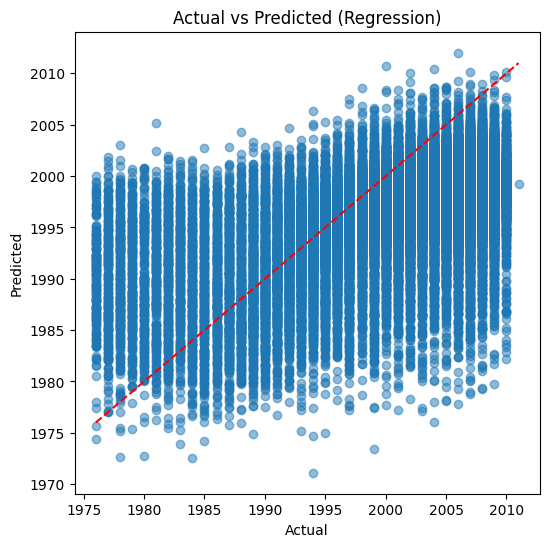

In [15]:
def create_reg_model(input_dim):
    m = models.Sequential([
        layers.Input(shape=(input_dim,)),
        layers.Dense(256, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        # **Layer output tunggal untuk regresi**
        layers.Dense(1, activation='linear')
    ])
    m.compile(
        optimizer=optimizers.Adam(),
        loss='mse',
        metrics=[tf.keras.metrics.RootMeanSquaredError()]
    )
    return m

# Buat ulang model dan fit:
reg_model = create_reg_model(X_tr_p.shape[1])
reg_callbacks = [
    callbacks.EarlyStopping(monitor='val_root_mean_squared_error', patience=10, restore_best_weights=True),
    callbacks.ModelCheckpoint('regressor.h5', save_best_only=True),
    callbacks.ReduceLROnPlateau(monitor='val_root_mean_squared_error', factor=0.5, patience=5)
]
hist_reg = reg_model.fit(
    X_tr_p, y_tr_reg,
    validation_data=(X_te_p, y_te_reg),
    epochs=100, batch_size=32,
    callbacks=reg_callbacks
)

# Evaluate Regression
y_pred_reg = reg_model.predict(X_te_p).flatten()  # sekarang shape (n_samples,)
mse  = mean_squared_error(y_te_reg, y_pred_reg)
rmse = np.sqrt(mse)
r2   = r2_score(y_te_reg, y_pred_reg)
print(f'MSE: {mse:.4f}, RMSE: {rmse:.4f}, R2: {r2:.4f}')

plt.figure(figsize=(6,6))
plt.scatter(y_te_reg, y_pred_reg, alpha=0.5)
plt.plot(
    [y_te_reg.min(), y_te_reg.max()],
    [y_te_reg.min(), y_te_reg.max()],
    'r--'
)
plt.title('Actual vs Predicted (Regression)')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


In [16]:
# 10. Enhanced Classification with Hyperparameter Tuning
# SMOTE for imbalance
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_tr_clf_p, y_tr_clf)

def build_clf_model(hp):
    inp = layers.Input(shape=(X_res.shape[1],))
    x = inp
    # tune number of layers and units
    for i in range(hp.Int('num_layers', 2, 4)):
        units = hp.Int(f'units_{i}', min_value=32, max_value=128, step=32)
        x = layers.Dense(units, activation='relu')(x)
        if hp.Boolean(f'batchnorm_{i}'):
            x = layers.BatchNormalization()(x)
        x = layers.Dropout(hp.Float(f'dropout_{i}', 0.2, 0.5, step=0.1))(x)
    out = layers.Dense(2, activation='softmax')(x)
    model = models.Model(inp, out)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=hp.Float('lr', 1e-4, 1e-2, sampling='log')),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

tuner = kt.Hyperband(
    build_clf_model,
    objective='val_accuracy',
    max_epochs=30,
    factor=3,
    directory='kt_dir',
    project_name='mlp_clf'
)
# Early stop on tuner
stop_early = callbacks.EarlyStopping(monitor='val_accuracy', patience=5)
tuner.search(X_res, y_res, epochs=30, validation_split=0.2, callbacks=[stop_early])
best_model = tuner.get_best_models(num_models=1)[0]


Trial 90 Complete [00h 06m 17s]
val_accuracy: 0.7668634057044983

Best val_accuracy So Far: 0.7673635482788086
Total elapsed time: 02h 19m 20s


1122/1122 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Accuracy: 0.7280, Precision: 0.6680, Recall: 0.8558, F1: 0.7503, AUC: 0.8201
              precision    recall  f1-score   support

           0       0.82      0.61      0.70     18745
           1       0.67      0.86      0.75     17142

    accuracy                           0.73     35887
   macro avg       0.75      0.73      0.73     35887
weighted avg       0.75      0.73      0.72     35887



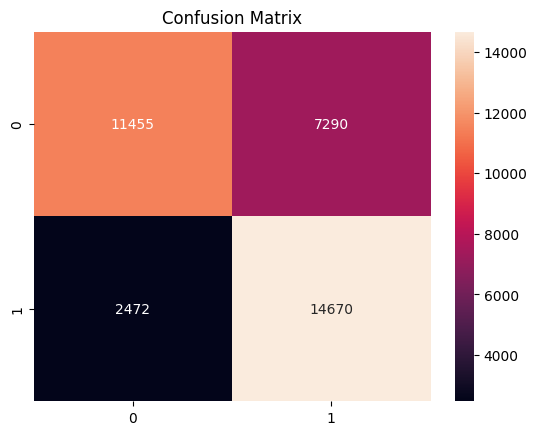

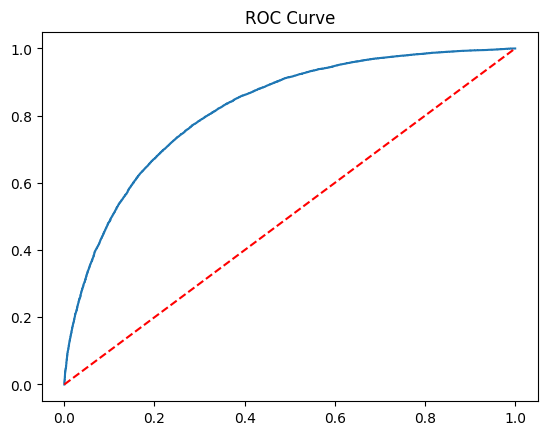

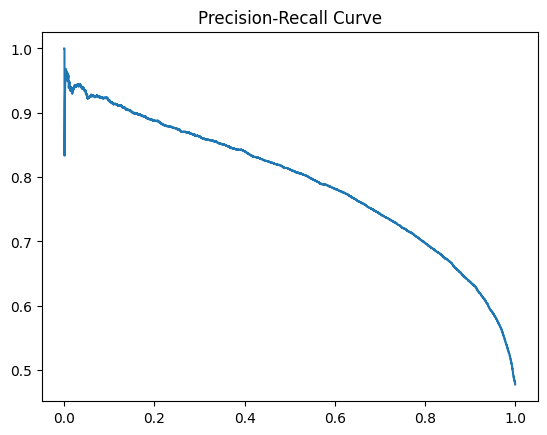

In [17]:
proba = best_model.predict(X_te_clf_p)
pred = np.argmax(proba, axis=1)
acc = accuracy_score(y_te_clf, pred)
prec = precision_score(y_te_clf, pred)
rec = recall_score(y_te_clf, pred)
f1 = f1_score(y_te_clf, pred)
auc = roc_auc_score(y_te_clf, proba[:,1])
print(f'Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1: {f1:.4f}, AUC: {auc:.4f}')
print(classification_report(y_te_clf, pred))
# Confusion Matrix
cm = confusion_matrix(y_te_clf, pred)
sns.heatmap(cm, annot=True, fmt='d'); plt.title('Confusion Matrix'); plt.show()
# ROC
fpr, tpr, _ = roc_curve(y_te_clf, proba[:,1]); plt.plot(fpr,tpr); plt.plot([0,1],[0,1],'r--'); plt.title('ROC Curve'); plt.show()
# Precision-Recall
prec_vals, rec_vals, _ = precision_recall_curve(y_te_clf, proba[:,1]); plt.plot(rec_vals, prec_vals); plt.title('Precision-Recall Curve'); plt.show()


/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 90))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(200, 90))']
  warnings.warn(msg)


<Figure size 640x480 with 0 Axes>

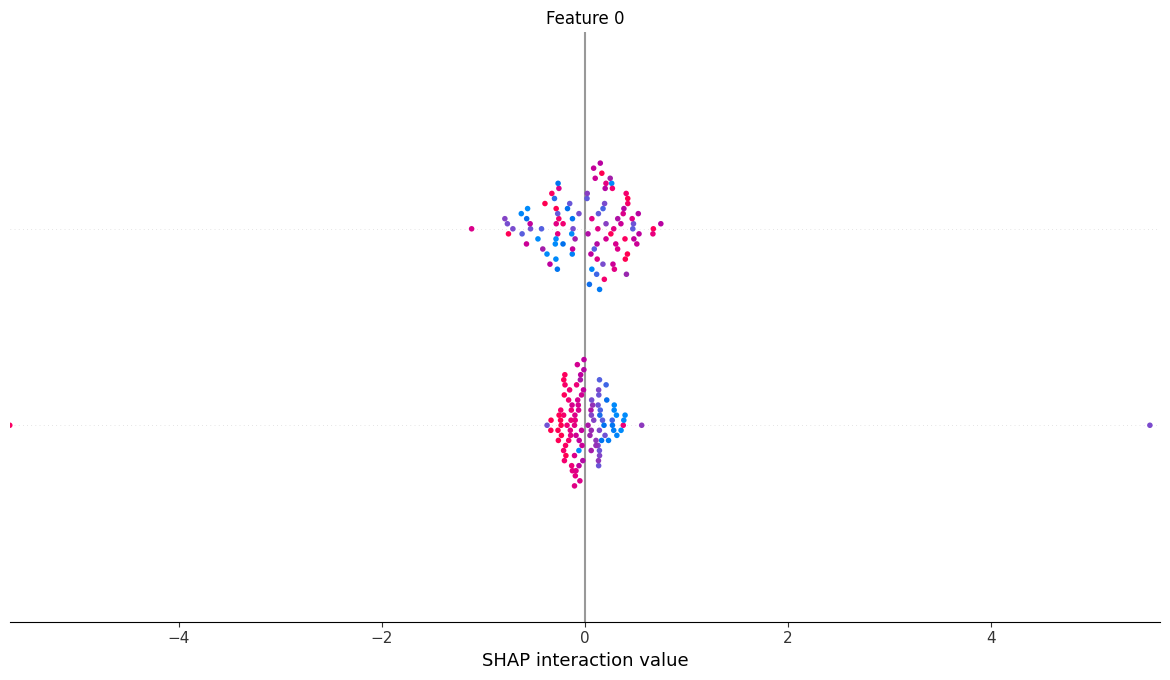

In [18]:
explainer = shap.DeepExplainer(best_model, X_te_clf_p[:100])
shap_vals = explainer.shap_values(X_te_clf_p[:100])
shap.summary_plot(shap_vals, X_te_clf_p[:100])

# Penjelasan dan Analisis Pipeline


## 1. Pembersihan Data (Data Cleaning)
- `dropna()` digunakan untuk menghapus baris dengan nilai kosong.
- `drop_duplicates()` menghapus duplikasi baris dalam dataset.
- Visualisasi boxplot digunakan untuk mendeteksi outlier.

## 2. Penanganan Outlier
- Outlier dibuang menggunakan metode IQR (Interquartile Range):

  $$
  IQR = Q3 - Q1
  $$

  Baris dianggap outlier jika:

  $$
  x < Q1 - 1.5 \times IQR \quad \text{atau} \quad x > Q3 + 1.5 \times IQR
  $$

## 3. Preprocessing Pipeline
- Fitur numerik distandarisasi menggunakan `StandardScaler`.
- Fitur kategorikal dikonversi ke representasi numerik menggunakan `OneHotEncoder`.
- Digabung menggunakan `ColumnTransformer`.

## 4. Persiapan Target
- Target regresi diubah menjadi target klasifikasi biner berdasarkan median:

  $$
  y_{\text{clf}} = \begin{cases}
    1, & \text{jika } y_{\text{reg}} > \text{median}(y_{\text{reg}}) \\
    0, & \text{lainnya}
  \end{cases}
  $$

## 5. Visualisasi Data
- Histogram distribusi target regresi.
- Countplot distribusi target klasifikasi.
- Heatmap matriks korelasi antar fitur numerik.

## 6. Pembagian Data (Train-Test Split)
- Data dibagi menjadi training dan testing.
- Untuk klasifikasi, digunakan `stratify` untuk menjaga distribusi kelas.

## 7. Model Regresi
- Model neural network sederhana dibuat dengan `Dense`, `BatchNormalization`, dan `Dropout`.
- Fungsi aktivasi `ReLU`, fungsi loss `MSE`, dan metrik `RMSE` digunakan.

### Evaluasi Regresi:
- Mean Squared Error (MSE):

  $$
  \text{MSE} = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  $$

- Root Mean Squared Error (RMSE):

  $$
  \text{RMSE} = \sqrt{\text{MSE}}
  $$

- Coefficient of Determination ($R^2$):

  $$
  R^2 = 1 - \frac{\sum (y - \hat{y})^2}{\sum (y - \bar{y})^2}
  $$

## 8. Klasifikasi dengan Hyperparameter Tuning
- Oversampling kelas minoritas dilakukan dengan SMOTE.
- Model neural network dibangun menggunakan `keras-tuner` dengan metode `Hyperband`.
- Tuning dilakukan terhadap jumlah layer, unit per layer, dropout, batch normalization, dan learning rate.

## 9. Evaluasi Model Klasifikasi

### Metrik:
- **Accuracy**:

  $$
  \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
  $$

- **Precision**:

  $$
  \text{Precision} = \frac{TP}{TP + FP}
  $$

- **Recall**:

  $$
  \text{Recall} = \frac{TP}{TP + FN}
  $$

- **F1 Score**:

  $$
  F1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}
  $$

- **ROC AUC**: Mengukur kemampuan model membedakan antara kelas 0 dan 1.

## 10. Interpretasi Hasil Klasifikasi


| Kelas | Precision | Recall | F1-score | Support |
|-------|-----------|--------|----------|---------|
| 0     | 0.82      | 0.63   | 0.71     | 18745   |
| 1     | 0.67      | 0.85   | 0.75     | 17142   |

### Analisis:
- Model cukup **baik dalam mendeteksi kelas 1** (recall tinggi = 0.85).
- Precision kelas 1 = 0.67, menunjukkan adanya false positive yang cukup banyak.
- Recall kelas 0 lebih rendah (0.63), artinya beberapa kelas 0 salah diklasifikasikan sebagai 1.
- AUC sebesar 0.82 menunjukkan model memiliki kemampuan klasifikasi yang sangat baik secara keseluruhan.

### Cocok digunakan jika:
- Tujuan utamanya adalah **menghindari false negatives**, misalnya:
  - Deteksi penyakit
  - Deteksi kecurangan
  - Deteksi churn pelanggan

## 11. Visualisasi SHAP
- `SHAP` digunakan untuk interpretabilitas model.
- `DeepExplainer` membantu mengukur kontribusi setiap fitur terhadap prediksi.
- `summary_plot` memberikan gambaran fitur mana yang paling mempengaruhi output model.
